# Nfl Draft Data Pipeline

Greg Shoda

Info I535

Course Project

## Introduction

The NFL Draft is one of the most anticipated events of the NFL offseason, where all 32 NFL teams get the chance to improve their roster by adding the most talented eligible College Football players to their teams via a selection process outlined by the NFL (1). The draft process from a high level is simple, the NFL team with the worst win-loss record receives the first pick in the NFL draft who, in theory, is the best college football player. Then the second worst team will select a player, then the third worst team, etc. (1)

Teams begin to evaluate potential draft prospects years in advance, sending team scouts to watch College Football players all throughout the country to get a good understanding of who are the best College Football players (2). Once the NFL Season is over by one team winning the Super Bowl, the NFL offseason begins with a scheduled outline of when offseason events will take place. Two months before the NFL Draft, the NFL will invite 300 College Football players who have declared their intent to end their College Football career to play in the NFL to showcase their abilities at the NFL combine. The NFL Combine allows all NFL team scouts and coaches to meet in a single location with the new college prospects where the prospects go through interviews, drills, and physical tests (like the 40-yard dash) (1).
This all leads up to the NFL Draft event in late April where teams finally select the college players which will be joining their team in the upcoming season. The draft consists of 7 different rounds across three days. Each team has at least one selection in each of the 7 rounds, however some teams can have multiple selections in each round due to different NFL transactions (trades, compensatory draft selections, etc.).


## Background

While the logistics of the NFL Draft are understood by the teams and fans across the league, we are still with the question: how do you determine who the best player is when it is your team’s turn to select a player in the NFL Draft? Of course, different teams have different approaches, and each team’s roster of current players will also help a team determine what players they will target in the draft. Throughout the history of the NFL teams used to rely more heavily on scouts and personal analysis of a player, however in the 21st century we have seen a modernization of the NFL to rely more heavily on statistics and data analytics. As of 2023, each NFL team has at least two full time staff dedicated to analytics, and 21 of the 32 NFL teams have at least three full-time analytics employees (6).

The NFL draft has multiple facets where Data Analytics can be utilized to gain an advantage and help an NFL team create the best roster of players possible to help them win a Super Bowl. One of the most significant ways Data Analytics can be used is to help evaluate NFL draft prospects. Data Analytics can also help teams better evaluate draft strategies by establishing team needs and positional value to help teams maneuver their position in the draft to maximize the value in the player’s they are able to draft. Finally, data analytics can be used to help teams evaluate the trades that take place during the draft (7).

Due to the rise in data analytics being used to help teams evaluate draft prospects, I have decided to base my project on building a data pipeline to extract various sources of data that could be used to help teams evaluate players for the NFL Draft, transform the data to an actionable analytics format, and store the data to be used for analysis.

## Methodology

To implement a data pipeline for NFL Draft prospect analysis, I will be creating a project within the google cloud platform. We will be using google cloud platform as it comes with a built-in cloud shell Linux environment to run bash scripts, as well as a built-in coding editor with Python interpreters which we will use for data extraction from our various data sources. Once the data is extracted using Python, we will then use the Google BigQuery APIs to load the extracted data into Google BigQuery. The data will be shared for analytics purposes via google BigQuery, however, to preserve the data for long term storage and future use, we will sync our data in Google BigQuery with Google Cloud Storage.

For teams to perform data analysis about players they want to take in an upcoming NFL Draft, they will need to look at the NFL draft from a historical perspective. They will want data from previous drafts, and data showing that players performance once they began playing in the NFL. Once they perform historical analysis of college prospects and understand what they deem to be a successful profile for a college football player, they then can apply their analysis on the upcoming class of college football players to help them determine who they want to select in the NFL Draft. Therefore, the expected outcome for the data pipeline is to provide historical NFL combine statistics for the NFL Draft prospects, those players career NFL statistics, and those players college football data from when they were playing college football.

For the NFL combine and NFL career statistics, I will be using data hosted on the website www.pro-football-reference.com. This site is one of many sites under the umbrella of www.sports-reference.com/ which has been collecting NFL data and offering it to its users to enjoy since the year 2000. Pro Football Reference offers all NFL combine statistic data through the year 2000, as well as data for all players selected in the NFL Draft since the year 2000 (8).

While Pro Football Reference does not offer an API to access data over the web, they do allow their website to be “scraped” by making an API call directly to the website and returning its contents in HTML format. We can then use the Python package Beautiful Soup to take the data in its HTML table format and transform it into a much more usable Pandas DataFrame. Once the data is in a DataFrame we can perform any data cleaning operations that are needed for the data, as well as adding any additional data to the dataframe that can be used for reporting purposes.

For the College Football data from when players were playing college football, we will use data offered from https://www.collegefootballdata.com. Collegefootballdata.com is a free to use website that offers a companion API that allows access to college football game data, team data, and player data. To access the API, I signed up for a free CollegeFootballData account which offered access to an API bearer token to make requests to the CollegeFootballData database. I used this bearer token in tandem with the Python “Requests” package which will create an HTTP Get request based on a URL and headers passed through in the request. The request will then return the data in JSON format, which we can then use the .json() python method to parse the JSON data and convert it to a Python dictionary. We can then pass the python dictionary into a Pandas dataframe where we can make any of the data cleaning actions needed on the returned data.

Finally, to provide proof of concept of our data pipeline I will connect to our data housed in Google BigQuery from Microsoft PowerBI to show how the pipeline can be used after its load into google BigQuery.

### Data Architecture Approach

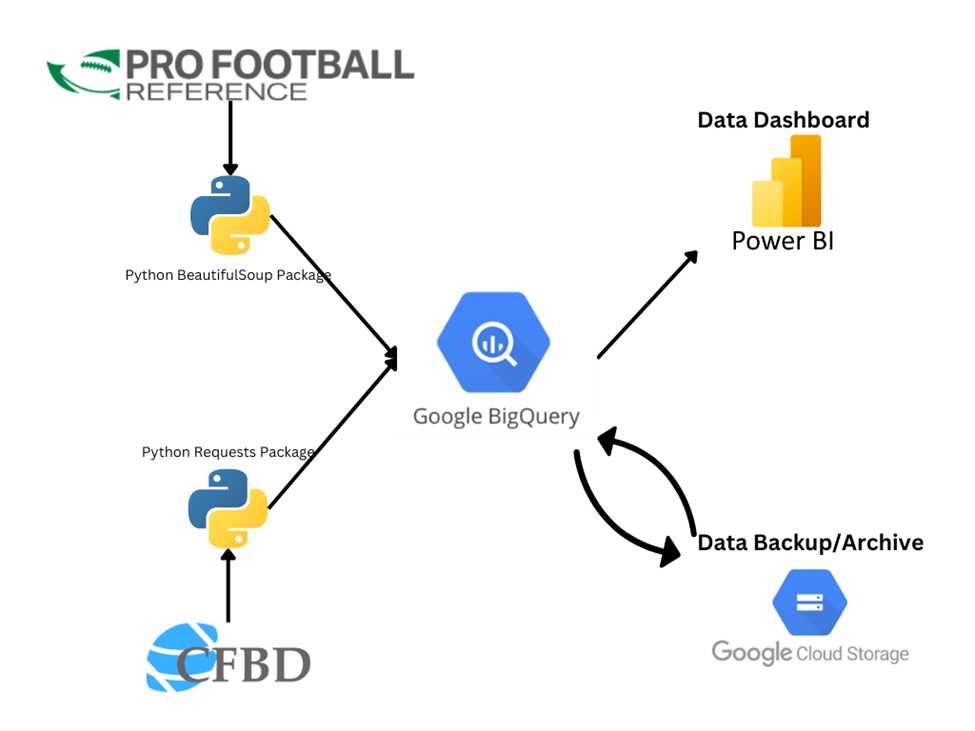

## Results

As listed in the methodology above, the first step was to create a project in google cloud platform, where we would be implementing our pipeline. 

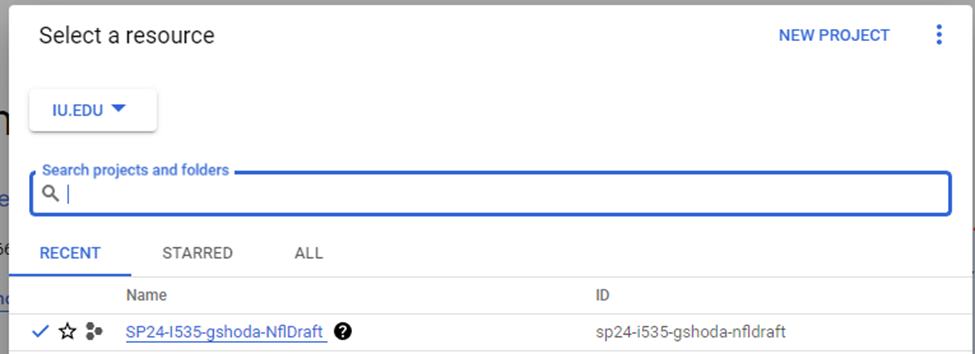

Once the project is created, we will need to ensure that the BigQuery API is turned on and usable. The BigQuery API is turned on by default, however we can go to our cloud shell and run the “gcloud services list” command to confirm it is available.

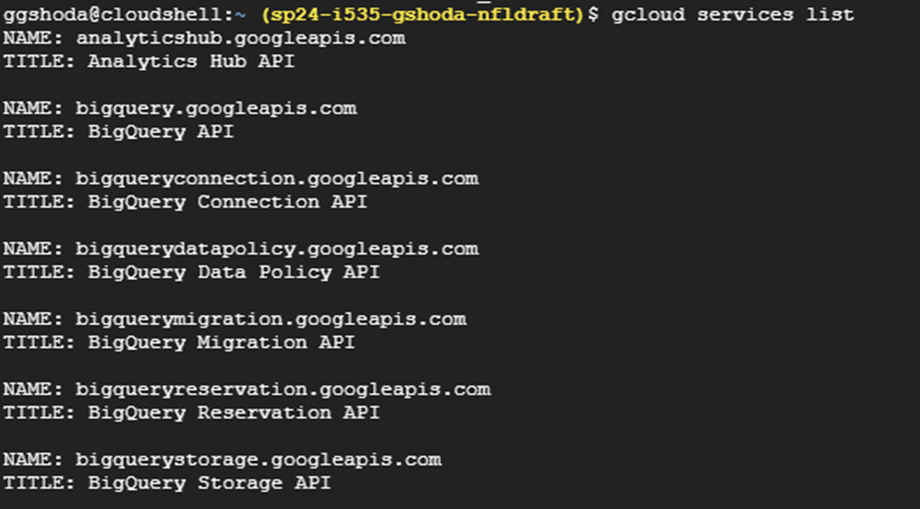

Finally, we will create a service account for our project which we can use to connect to BigQuery and load our extracted data into.

Once those steps are complete, we can go to the Google Cloud code editor and begin creating our notebook to extract our data from our various sources, transform our data, and load our data into BigQuery.



### Importing NFL Combine Data

Now that we have an established google cloud project, and a service account to access and load data into BigQuery, we can take our steps to extract data from our sources and load them into BigQuery. The first data source we will be taking data from is the combine data posted on profootballreference.com. Each year of combine data is stored in HTML tables on separate webpages within Pro Football Reference. Pro Football Reference began collecting data in the year 2000, so the oldest combine dataset is from the year 2000 and is stored on the webpage: https://www.pro-football-reference.com/draft/2000-combine.htm . 

The hyperlink for the combine data from the year 2000, has the year explicitly stated towards the end. To retrieve the combine data from the year 2000 until the current date, we can make an HTTP request to this webpage, and then we can interchange the string “2000” in the hyperlink with the string “2001” and send a new HTTP request. To do these repeated steps I create a range of integer values from 2000 to 2024 and used a for loop in python to interchange these values in the http website and pull down the website data for each webpage. I then converted each dataset into a pandas dataframe and concatenated all the dataframes together.


#### Importing Necessary Packages

In [ ]:
import pandas as pd
import json
import requests
from bs4 import BeautifulSoup
import time

#### Defining URL to Get Data

In [ ]:
#All NFL combine data is being pulled from sports-reference.com. Scraping and using their data is currently permitted under their terms of use
# provided you give credit to the site. 
#https://www.sports-reference.com/termsofuse.html

#They also request no more than twenty bot requests in one minute. Because I am referencing 25 pages, I am going to put a 10 second time delay between requests.
#https://www.sports-reference.com/bot-traffic.html


url_part1 = 'https://www.pro-football-reference.com/draft/'

url_end = '-combine.htm'

year_range = range(2000, 2025, 1)


counter = 1

data = []

#### Cycling through each link to get the data and appending it all into the same list

In [ ]:
for year in year_range:
    
    url = url_part1 + str(year) + url_end
    
    
    response = requests.get(url)
    
    
    html_content = response.content


    soup = BeautifulSoup(html_content, 'html.parser')


    table = soup.find('table', {'id': 'combine'})


    headers = [th.text.strip() for th in table.find('thead').find_all('th')]
    headers.append('Year')


    
    for row in table.find('tbody').find_all('tr'):
        row_data = [td.text.strip() for td in row.find_all(['th', 'td'])]
        row_data.append(year)
        data.append(row_data)
    

    time.sleep(10)

#### Turning the list into a Pandas DataFrame

In [ ]:
df = pd.DataFrame(data, columns = headers)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8473 entries, 0 to 8472
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Player               8473 non-null   object
 1   Pos                  8473 non-null   object
 2   School               8473 non-null   object
 3   College              8473 non-null   object
 4   Ht                   8473 non-null   object
 5   Wt                   8473 non-null   object
 6   40yd                 8473 non-null   object
 7   Vertical             8473 non-null   object
 8   Bench                8473 non-null   object
 9   Broad Jump           8473 non-null   object
 10  3Cone                8473 non-null   object
 11  Shuttle              8473 non-null   object
 12  Drafted (tm/rnd/yr)  8473 non-null   object
 13  Year                 8473 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 926.9+ KB


In [ ]:
df.head()

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr),Year
0,John Abraham,OLB,South Carolina,,6-4,252,4.55,,,,,,New York Jets / 1st / 13th pick / 2000,2000
1,Shaun Alexander,RB,Alabama,College Stats,6-0,218,4.58,,,,,,Seattle Seahawks / 1st / 19th pick / 2000,2000
2,Darnell Alford,OT,Boston Col.,,6-4,334,5.56,25.0,23,94,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,2000
3,Kyle Allamon,TE,Texas Tech,,6-2,253,4.97,29.0,,104,7.29,4.49,,2000
4,Rashard Anderson,CB,Jackson State,,6-2,206,4.55,34.0,,123,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,2000


#### Changing the columns to their appropriate columns, splitting out the drafted column, removing the college column, converting height column to separate feet and inches columns

In [ ]:
#Dropping the college column
df = df.drop(columns=['College'])


In [ ]:
df[['Feet', 'Inches']] = df['Ht'].str.split('-', expand=True)

In [ ]:
df['Player'] = df['Player'].astype(str)
df['Pos'] = df['Pos'].astype(str)
df['School'] = df['School'].astype(str)
df['Ht'] = df['Ht'].astype(str)

In [ ]:
df['Wt'] = pd.to_numeric(df['Wt'], errors = 'coerce').fillna(0).astype(int)
df['40yd'] = pd.to_numeric(df['40yd'], errors = 'coerce').fillna(0).astype(float)
df['Vertical'] = pd.to_numeric(df['Vertical'], errors = 'coerce').fillna(0).astype(float)
df['Bench'] = pd.to_numeric(df['Bench'], errors = 'coerce').fillna(0).astype(int)
df['Broad Jump'] = pd.to_numeric(df['Broad Jump'], errors = 'coerce').fillna(0).astype(int)
df['3Cone'] = pd.to_numeric(df['3Cone'], errors = 'coerce').fillna(0).astype(float)
df['Shuttle'] = pd.to_numeric(df['Shuttle'], errors = 'coerce').fillna(0).astype(float)
df['Feet'] = pd.to_numeric(df['Feet'], errors = 'coerce').fillna(0).astype(int)
df['Inches'] = pd.to_numeric(df['Inches'], errors = 'coerce').fillna(0).astype(int)

In [ ]:
df['Height'] = df['Feet'] * df['Inches']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8473 entries, 0 to 8472
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               8473 non-null   object 
 1   Pos                  8473 non-null   object 
 2   School               8473 non-null   object 
 3   Ht                   8473 non-null   object 
 4   Wt                   8473 non-null   int64  
 5   40yd                 8473 non-null   float64
 6   Vertical             8473 non-null   float64
 7   Bench                8473 non-null   int64  
 8   Broad Jump           8473 non-null   int64  
 9   3Cone                8473 non-null   float64
 10  Shuttle              8473 non-null   float64
 11  Drafted (tm/rnd/yr)  8473 non-null   object 
 12  Year                 8473 non-null   int64  
 13  Feet                 8473 non-null   int64  
 14  Inches               8473 non-null   int64  
 15  Height               8473 non-null   i

#### Renaming Columns into camel case naming convention

In [ ]:
df = df.rename(columns = {'Player': 'playerName',
                            'Pos':'position',
                            'School':'school',
                            'Ht':'heightStr',
                            'Wt':'weight',
                            '40yd':'fortyYardDash',
                            'Veritcal':'verticalJump',
                            'Bench':'benchPress',
                            '3Cone':'threeCone',
                            'Shuttle':'shuttleRun',
                            'Year':'combineYear',
                            'Height':'height'})

In [ ]:
df = df.drop(columns=['Feet', 'Inches'])

In [ ]:
split_columns = pd.DataFrame()

#### Splitting a column with multiple data points in it so each have their own defined column

In [ ]:
split_columns[['Team', 'Round', 'Pick', 'Year']] = df['Drafted (tm/rnd/yr)'].str.split('/', expand = True)

In [ ]:
split_columns['Team'] = split_columns['Team'].replace('', pd.NA).fillna('Undrafted')

In [ ]:
split_columns['Round'] = split_columns['Round'].str.replace('[a-zA-Z]', '', regex=True)
split_columns['Pick'] = split_columns['Pick'].str.replace('[a-zA-Z]', '', regex=True)
split_columns['Year'] = split_columns['Year'].str.replace('[a-zA-Z]', '', regex=True)

In [ ]:
import numpy as np
df[['draftedBy', 'draftRound', 'draftPick', 'draftedYear']] = split_columns
df['draftRound'] = pd.to_numeric(df['draftRound'], errors = 'coerce').fillna('0').astype(int)
df['draftPick'] = pd.to_numeric(df['draftPick'], errors = 'coerce').fillna('0').astype(int)
df['draftedYear'] = pd.to_numeric(df['draftedYear'], errors = 'coerce').fillna('0').astype(int)

In [ ]:
df = df.drop(columns = ['Drafted (tm/rnd/yr)'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8473 entries, 0 to 8472
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   playerName     8473 non-null   object 
 1   position       8473 non-null   object 
 2   school         8473 non-null   object 
 3   heightStr      8473 non-null   object 
 4   weight         8473 non-null   int64  
 5   fortyYardDash  8473 non-null   float64
 6   Vertical       8473 non-null   float64
 7   benchPress     8473 non-null   int64  
 8   Broad Jump     8473 non-null   int64  
 9   threeCone      8473 non-null   float64
 10  shuttleRun     8473 non-null   float64
 11  combineYear    8473 non-null   int64  
 12  height         8473 non-null   int64  
 13  draftedBy      8473 non-null   object 
 14  draftRound     8473 non-null   int64  
 15  draftPick      8473 non-null   int64  
 16  draftedYear    8473 non-null   int64  
dtypes: float64(4), int64(8), object(5)
memory usage: 1.1

#### Importing BigQuery package, defining my bigquery credentials to an environment variable, creating my bigquery table and loading the table with the processed data

In [ ]:
from google.cloud import bigquery
import os

In [ ]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/home/gshoda/key.json'

In [ ]:
client = bigquery.Client()

In [ ]:
#Uncomment below if running for the first time. These create the NFL_Draft dataset, and the Combine_Data table in GBQ

#dataset = client.create_dataset'NFL_Draft'
#table = dataset.table('Combine_Data')

In [ ]:
project_id = "sp24-i535-gshoda-nfldraft"
table_name = 'NFL_Draft.Combine_Data'

In [ ]:
job_config = bigquery.job.LoadJobConfig()
job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE

In [ ]:
#pip install pandas-gbq

In [ ]:
#pip install pyarrow

In [ ]:
import pandas_gbq
pandas_gbq.to_gbq(df, table_name, project_id=project_id, if_exists='replace')

### Importing NFL Draft Data

The draft data that is hosted on Pro Football Reference also dates to the year 2000. This dataset shows the player that was selected, their draft position, the team that drafted them, and their overall NFL career statistics. Much like the combine data, the draft data webpages are also only differentiated by the year listed in the webpage link. By creating a range of all the years of data, we can send a request to each webpage and concatenate the pandas dataframes in the same manner that we did with the combine data.

#### Establishing URL's to cycle through to get draft data

In [ ]:
#All NFL draft data is being pulled from sports-reference.com. Scraping and using their data is currently permitted under their terms of use
# provided you give credit to the site. 
#https://www.sports-reference.com/termsofuse.html

#They also request no more than twenty bot requests in one minute. Because I am referencing 25 pages, I am going to put a 10 second time delay between requests.
#https://www.sports-reference.com/bot-traffic.html

url_part1 = 'https://www.pro-football-reference.com/years/'

url_part2 = '/draft.htm'

year_range = range(2000, 2024, 1)

counter = 1

data = []

#### Cycling through each webpage and appending all scraped data into a python list

In [ ]:
for year in year_range:
    url = url_part1 + str(year) + url_part2

    response = requests.get(url)

    html_content = response.content

    soup = BeautifulSoup(html_content, 'html.parser')

    table = soup.find('table', {'id': 'drafts'})

    headers = [th.text.strip() for th in table.find('thead').find_all('th')]

    for row in table.find('tbody').find_all('tr'):
        row_data = [td.text.strip() for td in row.find_all(['th', 'td'])]
        row_data.append(year)
        data.append(row_data)
    

    time.sleep(10)


remove_header_values = ['', 'Misc', 'Approx Val', 'Passing', 'Rushing', 'Receiving']

for value in remove_header_values:
    if value in headers:
        headers.remove(value)

headers = [x for x in headers if x != '']
headers.append('extraRow')
headers.append('Year')

#### Better defining columns that all share a similar name despite technically being different statistics

In [ ]:
counter = 0
for i in range(len(headers)):
    if headers[i] == 'TD':
        if counter == 0:
            headers[i] = 'passingTouchdowns'
            counter += 1
        elif counter == 1:
            headers[i] = 'rushingTouchdowns'
            counter += 1
        elif counter == 2:
            headers[i] = 'receivingTouchdowns'
            counter += 1

counter = 0
for i in range(len(headers)):
    if headers[i] == 'Att':
        if counter == 0:
            headers[i] = 'passingAttempts'
            counter += 1
        elif counter == 1:
            headers[i] = 'rushingAttempts'
            counter += 1

counter = 0
for i in range(len(headers)):
    if headers[i] == 'Yds':
        if counter == 0:
            headers[i] = 'passingYards'
            counter += 1
        elif counter == 1:
            headers[i] = 'rushingYards'
            counter += 1
        elif counter == 2:
            headers[i] = 'receivingYards'
            counter += 1


counter = 0
for i in range(len(headers)):
    if headers[i] == 'Int':
        if counter == 0:
            headers[i] = 'thrownInterceptions'
            counter += 1
        elif counter == 1:
            headers[i] = 'caughtInterceptions'
            counter += 1


#### Turning Python list into a DataFrame

In [ ]:
df = pd.DataFrame(data, columns = headers)

In [ ]:
df.head()

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,rushingTouchdowns,Rec,receivingYards,receivingTouchdowns,Solo,caughtInterceptions,Sk,College/Univ,extraRow,Year
0,1,1,CLE,Courtney Brown,DE,22,2005,0,0,4,...,0,0,0,0,156,,19.0,Penn St.,College Stats,2000
1,1,2,WAS,LaVar Arrington,LB,22,2006,0,3,5,...,0,0,0,0,338,3,23.5,Penn St.,College Stats,2000
2,1,3,WAS,Chris Samuels,T,23,2009,0,6,9,...,0,0,0,0,,,,Alabama,College Stats,2000
3,1,4,CIN,Peter Warrick,WR,23,2005,0,0,4,...,2,275,2991,18,3,,,Florida St.,College Stats,2000
4,1,5,BAL,Jamal Lewis,RB,21,2009,1,1,9,...,58,221,1879,4,,,,Tennessee,College Stats,2000


#### Renaming columns that haven't already been renamed into Camel case

In [ ]:
for column_name in df.columns:
    print(column_name)

Rnd
Pick
Tm
Player
Pos
Age
To
AP1
PB
St
wAV
DrAV
G
Cmp
passingAttempts
passingYards
passingTouchdowns
thrownInterceptions
rushingAttempts
rushingYards
rushingTouchdowns
Rec
receivingYards
receivingTouchdowns
Solo
caughtInterceptions
Sk
College/Univ
extraRow
Year


In [ ]:
df = df.drop(columns = ['College/Univ', 'extraRow'])

In [ ]:
df = df.rename(columns = {
                            'Rnd':'draftRound',
                            'Pick':'draftPick',
                            'Tm': 'draftedBy',
                            'Player':'playerName',
                            'Pos': 'position',
                            'Age': 'age',
                            'To': 'playedUntilYear',
                            'AP1': 'timesFirstTeamAllPro',
                            'PB': 'timesProBowl',
                            'St': 'gamesStarted',
                            'wAV': 'weightedCareerApproximateValue',
                            'DrAV': 'draftedTeamApproximateValue',
                            'G':'gamesPlayed',
                            'Cmp':'passingCompletions',
                            'Rec': 'receptions',
                            'Solo':'soloTackles',
                            'Sk': 'sacks'})

In [ ]:
for column_name in df.columns:
    print(column_name)

draftRound
draftPick
draftedBy
playerName
position
age
playedUntilYear
timesFirstTeamAllPro
timesProBowl
gamesStarted
weightedCareerApproximateValue
draftedTeamApproximateValue
gamesPlayed
passingCompletions
passingAttempts
passingYards
passingTouchdowns
thrownInterceptions
rushingAttempts
rushingYards
rushingTouchdowns
receptions
receivingYards
receivingTouchdowns
soloTackles
caughtInterceptions
sacks
Year


#### Defining google big query table schema to import data

In [ ]:
table_schema = [
    {'name': 'draftRound', 'type': 'INTEGER', 'mode': 'REQUIRED', 'description': 'The round that the player was selected in in the NFL draft'},
    {'name': 'draftPick', 'type': 'INTEGER', 'mode': 'REQUIRED', 'description' : 'The pick in the draft used to select the player'}, 
    {'name': 'draftedBy', 'type': 'STRING', 'mode': 'REQUIRED', 'description':'The NFL team that selected the player in the draft'},
    {'name': 'playerName', 'type': 'STRING', 'mode': 'REQUIRED', 'description':'The name of the player'},
    {'name': 'position', 'type': 'STRING', 'mode': 'NULLABLE', 'description':'The football position played by the player'},
    {'name': 'age', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The age of the player when they were drafted'},
    {'name': 'playedUntilYear', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The last year the player played in the NFL'},
    {'name': 'timeFirstTeamAllPro', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The number of times the player was selected to the all pro first team'},
    {'name': 'timesProBowl', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The number of times the player was selected to the Pro Bowl'},
    {'name': 'gamesStarted', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The number of games started by the player'},
    {'name': 'weightedCareerApproximateValue', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'A calculated value by profootballreference stating how well the players career panned out'},
    {'name': 'draftedTeamApproximateValue', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The amount of career value the player provided to the team that drafted them'},
    {'name': 'gamesPlayed', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'Total number of games a player has played in their career'},
    {'name': 'passingCompletions', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The amount of passes thrown by the player that were completed'},
    {'name': 'passingAttempts', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The amount of passes thrown by the player'},
    {'name': 'passingYards', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The amount of yards gained by passing'},
    {'name': 'passingTouchdowns', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The amount of touchdowns thrown by the player'},
    {'name': 'thrownInterceptions', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The amount of passes thrown by the player'},
    {'name': 'rushingAttempts', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The amount of times the player has ran the ball'},
    {'name': 'rushingYards', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The amount of yards the player has ran the ball for'},\
    {'name': 'rushingTouchdowns', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The amount of touchdowns scored by the player when running the ball'},
    {'name': 'receptions', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The amount of passes caught by the player'},
    {'name': 'receivingYards', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The amount of yards gained by the player when catching the ball'},
    {'name': 'receivingTouchdowns', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The amount of passes caught by the player resulting in a touchdown'},
    {'name': 'soloTackles', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The amount of tackles made by the player singlehandedly'},
    {'name': 'sacks', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The amount of times the player tackled the quarterback'},
    {'name': 'Year', 'type': 'INTEGER', 'mode': 'NULLABLE', 'description':'The year the player was drafted'}
]   

In [ ]:
#from google.cloud import bigquery
#import os

In [ ]:
#os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/home/gshoda/key.json'

In [ ]:
client = bigquery.Client()

#### Defining BigQuery dataset and data table, to load cleaned data into

In [ ]:
dataset = 'sp24-i535-gshoda-nfldraft.NFL_Draft'

#unmute if creating the table for the firs time
#table_ref = client.dataset(dataset).table('Draft_Data')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6274 entries, 0 to 6273
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   draftRound                      6274 non-null   object
 1   draftPick                       6274 non-null   object
 2   draftedBy                       6274 non-null   object
 3   playerName                      6274 non-null   object
 4   position                        6274 non-null   object
 5   age                             6274 non-null   object
 6   playedUntilYear                 6274 non-null   object
 7   timesFirstTeamAllPro            6274 non-null   object
 8   timesProBowl                    6274 non-null   object
 9   gamesStarted                    6274 non-null   object
 10  weightedCareerApproximateValue  6274 non-null   object
 11  draftedTeamApproximateValue     6274 non-null   object
 12  gamesPlayed                     6274 non-null   

In [ ]:
df['draftRound'] = pd.to_numeric(df['draftRound'], errors = 'coerce').fillna('0').astype(int)
df['draftPick'] = pd.to_numeric(df['draftPick'], errors = 'coerce').fillna('0').astype(int)
df['age'] = pd.to_numeric(df['age'], errors = 'coerce').fillna('0').astype(int)
df['playedUntilYear'] = pd.to_numeric(df['playedUntilYear'], errors = 'coerce').fillna('0').astype(int)
df['timesFirstTeamAllPro'] = pd.to_numeric(df['timesFirstTeamAllPro'], errors = 'coerce').fillna('0').astype(int)
df['timesProBowl'] = pd.to_numeric(df['timesProBowl'], errors = 'coerce').fillna('0').astype(int)
df['gamesStarted'] = pd.to_numeric(df['gamesStarted'], errors = 'coerce').fillna('0').astype(int)
df['weightedCareerApproximateValue'] = pd.to_numeric(df['weightedCareerApproximateValue'], errors = 'coerce').fillna('0').astype(int)
df['draftedTeamApproximateValue'] = pd.to_numeric(df['draftedTeamApproximateValue'], errors = 'coerce').fillna('0').astype(int)
df['gamesPlayed'] = pd.to_numeric(df['gamesPlayed'], errors = 'coerce').fillna('0').astype(int)
df['passingCompletions'] = pd.to_numeric(df['passingCompletions'], errors = 'coerce').fillna('0').astype(int)
df['passingAttempts'] = pd.to_numeric(df['passingAttempts'], errors = 'coerce').fillna('0').astype(int)
df['passingYards'] = pd.to_numeric(df['passingYards'], errors = 'coerce').fillna('0').astype(int)
df['passingTouchdowns'] = pd.to_numeric(df['passingTouchdowns'], errors = 'coerce').fillna('0').astype(int)
df['thrownInterceptions'] = pd.to_numeric(df['thrownInterceptions'], errors = 'coerce').fillna('0').astype(int)
df['rushingAttempts'] = pd.to_numeric(df['rushingAttempts'], errors = 'coerce').fillna('0').astype(int)
df['rushingYards'] = pd.to_numeric(df['rushingYards'], errors = 'coerce').fillna('0').astype(int)
df['rushingTouchdowns'] = pd.to_numeric(df['rushingTouchdowns'], errors = 'coerce').fillna('0').astype(int)
df['receptions'] = pd.to_numeric(df['receptions'], errors = 'coerce').fillna('0').astype(int)
df['receivingYards'] = pd.to_numeric(df['receivingYards'], errors = 'coerce').fillna('0').astype(int)
df['receivingTouchdowns'] = pd.to_numeric(df['receivingTouchdowns'], errors = 'coerce').fillna('0').astype(int)
df['soloTackles'] = pd.to_numeric(df['soloTackles'], errors = 'coerce').fillna('0').astype(int)
df['caughtInterceptions'] = pd.to_numeric(df['caughtInterceptions'], errors = 'coerce').fillna('0').astype(int)
df['sacks'] = pd.to_numeric(df['sacks'], errors = 'coerce').fillna('0').astype(int)

In [ ]:
pandas_gbq.to_gbq(df, 'NFL_Draft.Draft_Data', if_exists='replace', table_schema = table_schema)

### Import College Football Data 

Now that we have grabbed the NFL data from Pro Football Reference, we can begin gathering the data from the college football datasets. Using our API token, we can send requests to get all team information from the college football team API. Once we have all the team API, we can call the roster for each team, from each year that we would like to collect data. I think it is valuable to collect data even from college players that didn’t get drafted, so we can run analysis on what differentiated them from the players that did get drafted. I also think it is worthwhile to store team information to potentially identify a correlation between players drafted and the teams they were drafted from as their may be future indicators of successful players coming from these schools in the future.

#### Importing more packages to use

In [ ]:
#import requests
#import pandas as pd
#import json
from urllib.parse import quote

import warnings

# Mute all warnings
warnings.filterwarnings("ignore")

#### Establishing the URL to access the api, defining our api token and defining our headers to use to make the API call

In [ ]:
base_url = "https://api.collegefootballdata.com/"

url_add = "teams"

full_url = base_url + url_add

api_token = "gdgvvFI6ZGh3pmGC+3VLf+G7u0ErUjMgC8vDYZxSByy27d2Q7XWbfU3HURW0N6+z"

headers = {
    'Authorization': f'Bearer {api_token}',
    'Content-Type': 'application/JSON'}

#### Accessing the college football team data and converting it into a dataframe

In [ ]:
response = requests.get(full_url,
                     headers = headers)

data = response.json()

teams = pd.DataFrame(data)

year_list = range(2009,2024,1)


In [ ]:
teams['classification'].unique()

array(['fcs', 'ii', 'iii', 'fbs', None], dtype=object)

#### Defining a section of teams who have the NCAA classification FBS as this is where 99.9% of players are drafted from

This helps reduce the number of API calls to get a complete list of rosters in college football from the last 15 years

In [ ]:
teams_fbs = teams.loc[teams['classification'] == 'fbs']

Creating an empty dataframe to store the roster data into

In [ ]:
roster_information = pd.DataFrame()

#### Establishing the URL's needed to call to get the roster information for each year and for each school with FBS designation

In [ ]:
counter = 0

import time

start_time = time.time()

for year in year_list:
    for school in teams_fbs['school']:
        mod_team_name = quote(school)
        
        url_add = "roster?team=" + mod_team_name + "&year=" + str(year)
        
        full_url = base_url + url_add
        
        response = requests.get(full_url, headers = headers)
        
        data = response.json()
        
        new_df = pd.DataFrame(data)

        new_df['rosterYear'] = year

        roster_information = pd.concat([roster_information, new_df], ignore_index = True)

        counter += 1

        current_time = time.time()

        time_elapsed = current_time - start_time

        if counter % 100 == 0:
            print(counter, year, len(roster_information), time_elapsed)


100 2009 4278 66.15104341506958
200 2010 8580 135.87768125534058
300 2011 13130 206.31269931793213
400 2012 17672 277.04093313217163
500 2012 22504 348.53480291366577
600 2013 27634 419.2055072784424
700 2014 33319 488.8234007358551
800 2015 39494 557.3821003437042
900 2015 46375 631.0240659713745
1000 2016 54222 704.8144040107727
1100 2017 62708 775.6538963317871
1200 2018 71438 845.5027928352356
1300 2018 80710 916.3891086578369
1400 2019 91411 987.5397417545319
1500 2020 103120 1059.8272323608398
1600 2021 115188 1135.1508574485779
1700 2021 126583 1206.788650751114
1800 2022 138410 1276.1581861972809
1900 2023 150232 1346.6487770080566


In [ ]:
len(roster_information['id'].unique())

54289

In [ ]:
#pip install cfbda

teams.head(25)

In [ ]:
roster_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162765 entries, 0 to 162764
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                162765 non-null  object 
 1   first_name        162758 non-null  object 
 2   last_name         162757 non-null  object 
 3   team              162765 non-null  object 
 4   weight            118758 non-null  float64
 5   height            160512 non-null  float64
 6   jersey            159094 non-null  float64
 7   year              108828 non-null  float64
 8   position          161102 non-null  object 
 9   home_city         160323 non-null  object 
 10  home_state        159698 non-null  object 
 11  home_country      160312 non-null  object 
 12  home_latitude     157457 non-null  object 
 13  home_longitude    157457 non-null  object 
 14  home_county_fips  157249 non-null  object 
 15  recruit_ids       162765 non-null  object 
 16  rosterYear        16

In [ ]:
roster_information2 = roster_information #leaving a backup

In [ ]:
roster_information = roster_information2

#### Renaming columns to camel case

In [ ]:
roster_information = roster_information.rename(columns = {
                                                'id':'playerId',
                                                'first_name':'firstName',
                                                'last_name':'lastName',
                                                'team':'collegeTeam',
                                                'year':'schoolYear',
                                                'home_city':'homeCity',
                                                'home_state':'homeState',
                                                'home_country':'homeCountry',
                                                'home_latitude':'homeLatitude',
                                                'home_longitude':'homeLongitude',
                                                'home_county_fips':'homeCountyFips',
                                                'recruit_ids':'recruitIds'

})

In [ ]:
roster_information = roster_information.drop(columns= ['recruitIds'])

In [ ]:
#from google.cloud import bigquery
#import os

In [ ]:
#os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/home/gshoda/key.json'

In [ ]:
client = bigquery.Client()

In [ ]:
dataset = 'sp24-i535-gshoda-nfldraft.NFL_Draft'
table_ref = client.dataset(dataset).table('College_Players')

In [ ]:
import pandas_gbq

#### Defining BigQuery table name and importing team data and roster data into their own separate bigquery tables

In [ ]:
project_id = "sp24-i535-gshoda-nfldraft"
table_name = 'NFL_Draft.College_Players'

pandas_gbq.to_gbq(roster_information, table_name, project_id = project_id, if_exists='replace')

In [ ]:
teams_fbs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 3 to 879
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              133 non-null    int64 
 1   school          133 non-null    object
 2   mascot          133 non-null    object
 3   abbreviation    133 non-null    object
 4   alt_name1       18 non-null     object
 5   alt_name2       133 non-null    object
 6   alt_name3       133 non-null    object
 7   conference      133 non-null    object
 8   classification  133 non-null    object
 9   color           133 non-null    object
 10  alt_color       131 non-null    object
 11  logos           133 non-null    object
 12  twitter         132 non-null    object
 13  location        133 non-null    object
dtypes: int64(1), object(13)
memory usage: 15.6+ KB


In [ ]:
teams_fbs = teams_fbs.drop(columns = ['logos'])

In [ ]:
teams_fbs = teams_fbs.rename(columns = {
                                    'alt_name1':'alternateName1',
                                    'alt_name2':'alternateName2',
                                    'alt_name3':'alternateName3',
                                    'alt_color':'alternateColor'
})

In [ ]:
expanded_location = pd.json_normalize(teams_fbs['location'])

In [ ]:
teams_fbs_expanded = pd.concat([teams_fbs.drop(columns=['location']), expanded_location], axis = 1)

In [ ]:
teams_fbs_expanded.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 3 to 132
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                133 non-null    float64
 1   school            133 non-null    object 
 2   mascot            133 non-null    object 
 3   abbreviation      133 non-null    object 
 4   alternateName1    18 non-null     object 
 5   alternateName2    133 non-null    object 
 6   alternateName3    133 non-null    object 
 7   conference        133 non-null    object 
 8   classification    133 non-null    object 
 9   color             133 non-null    object 
 10  alternateColor    131 non-null    object 
 11  twitter           132 non-null    object 
 12  venue_id          133 non-null    float64
 13  name              133 non-null    object 
 14  city              133 non-null    object 
 15  state             133 non-null    object 
 16  zip               133 non-null    object 
 17  co

In [ ]:
teams_fbs_expanded = teams_fbs_expanded.rename(columns = {
                                                            'venue_id':'venueId',
                                                            'country_code':'countryCode',
                                                            'year_constructed':'yearConstructed'
})

In [ ]:
teams_fbs_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 3 to 132
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               133 non-null    float64
 1   school           133 non-null    object 
 2   mascot           133 non-null    object 
 3   abbreviation     133 non-null    object 
 4   alternateName1   18 non-null     object 
 5   alternateName2   133 non-null    object 
 6   alternateName3   133 non-null    object 
 7   conference       133 non-null    object 
 8   classification   133 non-null    object 
 9   color            133 non-null    object 
 10  alternateColor   131 non-null    object 
 11  twitter          132 non-null    object 
 12  venueId          133 non-null    float64
 13  name             133 non-null    object 
 14  city             133 non-null    object 
 15  state            133 non-null    object 
 16  zip              133 non-null    object 
 17  countryCode      132 

In [ ]:
teams_fbs_expanded['yearConstructed'] = pd.to_numeric(teams_fbs_expanded['yearConstructed'], errors = 'coerce').fillna('0').astype(int)
teams_fbs_expanded['id'] = pd.to_numeric(teams_fbs_expanded['id'], errors = 'coerce').fillna('0').astype(int)
teams_fbs_expanded['venueId'] = pd.to_numeric(teams_fbs_expanded['venueId'], errors = 'coerce').fillna('0').astype(int)
teams_fbs_expanded['capacity'] = pd.to_numeric(teams_fbs_expanded['capacity'], errors = 'coerce').fillna('0').astype(int)

In [ ]:
teams_fbs_expanded = teams_fbs_expanded.rename(columns = {
                    'id':'teamId'
})

In [ ]:
teams_fbs_expanded['grass'] = teams_fbs_expanded['grass'].fillna('0').astype(int).astype(bytes)
teams_fbs_expanded['dome'] = teams_fbs_expanded['dome'].fillna('0').astype(int).astype(bytes)

In [ ]:
#table_ref = client.dataset(dataset).table('College_Teams')

In [ ]:
project_id = "sp24-i535-gshoda-nfldraft"
table_name = 'NFL_Draft.College_Teams'

pandas_gbq.to_gbq(teams_fbs_expanded, table_name, project_id = project_id, if_exists='replace')

### Data Archive in Google Cloud Storage

Now that the data is in BigQuery, we can go into google cloud storage and create a bucket for long term data storage so that we know we have backup copies of our NFL Draft data. Once the bucket is created, we can use the BigQuery interface in google cloud to export the dataset directly to google cloud storage by defining the bucket it will be stored in, the name of the file that will store it, and the type of file. I stored my datasets in csv format in a storage bucket called shoda_nfldraft.

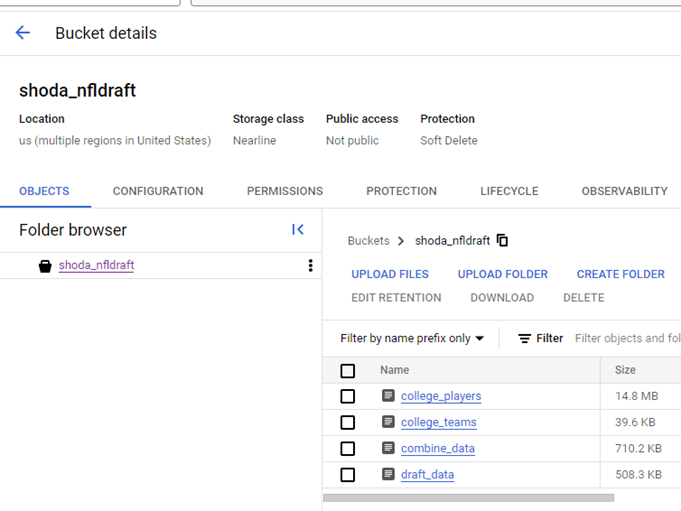

### Connecting BigQuery to PowerBI to create visualizations

Finally, now that our ETL process is complete, we can connect our BigQuery tables into Microsoft Power BI (or any visualization tool of your choice) to create some visualizations from our collected data.

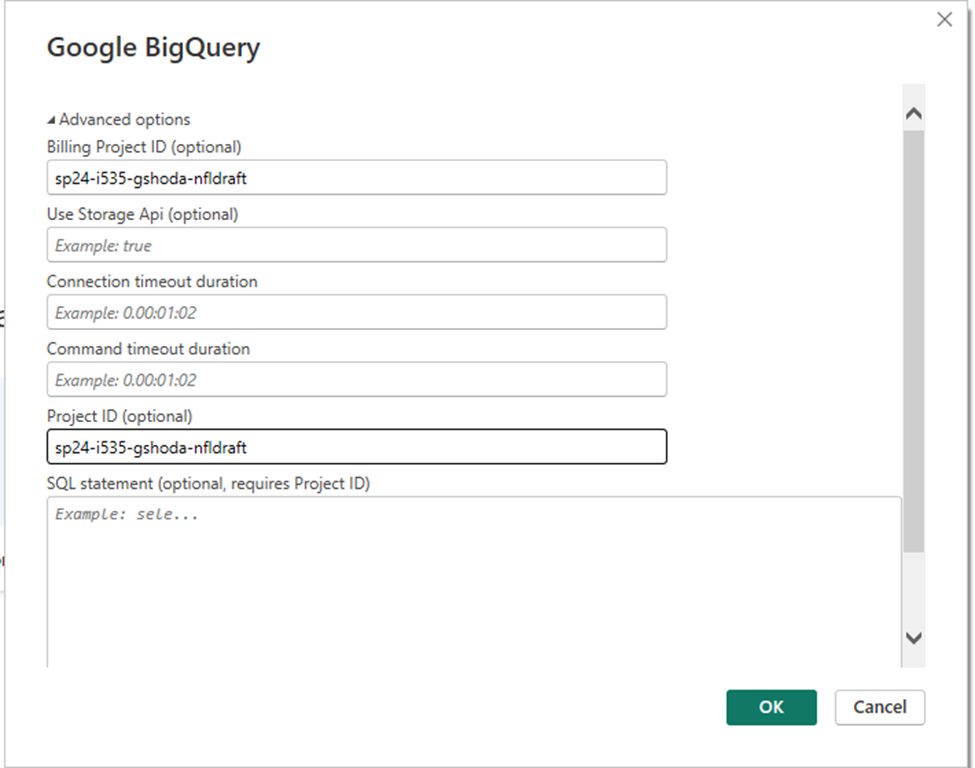

## Discussion

The implementation of a data pipeline using Python and BigQuery was overall successful with a few drawbacks. We were able to successfully grab the NFL combine data, and the NFL player career statistic data from Pro Football Reference and we were able to store this data into google BigQuery. We were also able to pull college football team information, and college football roster information and store this in BigQuery. One of the drawbacks we experienced was not having enough ability to pull all the respective college player’s career college football statistics.

Overall, we were able to meet our objectives of storing NFL combine data and NFL player career data, however we did not meet the stretch objective of extracting and storing player college football career data. However, teams can still use the current pipeline to evaluate historically what traits in the combine best lead to productive NFL players, what college teams lead to productive NFL players, what region of the United States produces the most NFL players, and what college conferences produce the most NFL players. They can find all these statistics for specific positions the players play in the NFL. They can also use the height and weight to discover if there is any statistical effect of these measurements when it comes to how productive a player’s NFL career will be.

When implementing the NFL Draft data pipeline, the main skills required were understanding Python programming, understanding web scraping, understanding API calls, and a base understanding of GCP and BigQuery. While this may sound like a lot of skills required to implement the pipeline, these are all widely used and understood skills with a lot of documentation available for troubleshooting. I came into this semester and was completely unfamiliar with any cloud or virtualization platforms and the skills I learned from the course surrounding the Google Cloud Platform and structured data really contributed towards the completion of this project.
After completing the pipeline, I think there are a lot of pros and cons from using Google Cloud Platform (GCP) as the main environment for the data pipeline. The first pro from using GCP was the flexibility it provided when creating the data pipeline. I did not have to use the same machine when writing the code to create the data pipeline. This allowed me to use both my home desktop and my work laptop to work on the project. The second pro was the ease of connectivity and ingestion options that google BigQuery provides. I chose to connect to google BigQuery using the available APIs provided by GCP, which were very convenient as they integrated perfectly with python to allow a quick ingestion from a pandas dataframe.

The experience of connecting to and pushing data into Google BigQuery is related heavily to the Ingest and Storage module we completed this semester. While Google BigQuery has similarities to NoSQL databases in the sense that it is designed to handle large scale data processing and querying, the data pushed to BigQuery needed to be structured data in the form of a typical row and column spreadsheet. This did add extra steps to my pipeline compared to a key-value or document database, since these types of databases would have been able to ingest the JSON data supplied from the college football database API. The extra data processing did hinder my ability to retrieve and process all the college football data I would have preferred to supply in the data pipeline. However, since this data pipeline will be used for analytic purposes, I do think it was the best decision to supply the data in the most structured form possible so that the data analyst or data scientist does not have to worry about formatting or data types.

The project to implement the NFL Draft data pipeline also harkened back to the Lifecycle and Pipeline module we completed this semester. In this module we learned about the lifecycle of data and the different theories or types of data pipelines you can implement depending on your needs. The lifecycle of the NFL Draft data, and the data I was able to access for my pipeline did take some processing to understand the limitations and how to continue processing going forward. Overall, my pipeline aligned best with the USGS model which is a straightforward data model.

The planning phase was done without much record keeping, just me exploring potential free data sources I could use to acquire my data. The acquisition process went smoothly using the Python request library to call the content from the webpages and API. The processing of the data was the most intensive portion of the pipeline, ensuring data types matched what they needed to be, as well as ensuring column naming conventions made sense, and ensuring the data had similar schemas that can be used to join the tables together. Finally, we used BigQuery and google cloud storage to backup and secure our data, and BigQuery will also serve as the system used to Publish and share our data. BigQuery holds the schema, which can be referenced either through the BigQuery application in the GCP console or can be accessed via API available through GCP. I could have done a better job commenting and annotating my data processing to ensure quality going forward.

Understanding data pipeline steps and lifecycle of data was another skill learned in this course which was applied to this project. Particularly the use of backing up my data to the google cloud storage. Before this course, I would not have completed this step for this project and would not have understood the importance of this step.

The data lifecycle for the NFL Draft is not too intensive, especially now that the historical data has been extracted and stored into BigQuery. Going forward college football data, NFL Combine Data, NFL Draft data, and NFL career statistic data will all only need updated once per year, at the end of the respective college football and NFL seasons. This data can be used in an ongoing analysis and the additional data can only serve to better tune the analytics and models developed by different teams to best aid in their draft strategies.

One of the complications the project faced was the availability of historical data for the pipeline. The NFL Draft and combine data accessed through Pro Football Reference dated back to the year 2000. This allowed for a 25-year sample size of combine data and a 24-year sample size of draft data (the pipeline was implemented in the two months span between the NFL combine and the NFL Draft). This is a large sample size that should be able to easily account for outliers. The college football dataset only allowed a historical look for the previous 15 college football seasons, dating back to 2009. While this is still an ample data sample to draw conclusions, it is unfortunate that we did not have matching data for the entire period dating back to the year 2000.

Another complication faced was the amount of time it took to query the historical data from the college football data set. Querying the teams was rather quick, however querying the roster for each team for each of the last 15 years was a process that in the end took 30 minutes to run. This was after I limited the team rosters to only FBS classified college football teams. I would also struggle with troubleshooting the data, as the process would run for 15-20 minutes and break, or I would notice that no data was being pulled for many API calls that I was making. This was also a contributing factor into why I was unable to pull and process the college football career statistic data and integrate it with the other tables in the pipeline project.


## Conclusion

Overall, I was able to take data from multiple sources, clean and modify this data, and load this data into Google BigQuery to be used for analysis in the future. While it was not the smoothest project, I do think the NFL Draft data pipeline will be very useful for exploratory and statistical analysis surrounding the effectiveness of different players selected in the NFL Draft.

## References

1) https://www.nbc.com/nbc-insider/how-does-the-nfl-draft-work-a-guide-to-the-annual-event

2) https://entertainment.howstuffworks.com/nfl-draft.htm

3) https://theathletic.com/5416007/2024/04/16/nfl-drafting-methods-insight-massey-thaler/

4) https://www.dailynorseman.com/2022/4/26/23042105/nfl-draft-pick-bust-rate-remains-very-high

5) https://www.espn.com/nfl/story/_/id/35189929/2022-nfl-analytics-survey-most-least-analytically-inclined-teams-overrated-underrated-players-more

6) https://footballscoop.com/news/the-nfls-deep-dive-into-analytics#:~:text=Every%20NFL%20team%20now%20has,three%20full%2Dtime%20analytics%20employees.
https://www.schneiderdowns.com/our-thoughts-on/data-analytics-and-the-nfl-draft

7) https://www.sports-reference.com/about.html

8) https://collegefootballdata.com/about

9) https://codelabs.developers.google.com/codelabs/cloud-bigquery-python#2
